In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random as rd
import seaborn as sns

In [2]:
dataset = pd.read_csv('College.csv')
dataset.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [3]:
dataset['Enrollment_Rate'] = (dataset['Enroll']/dataset['Accept'])*100.0
dataset.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Enrollment_Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,58.522727
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,26.611227
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,30.628988
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,39.255014
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,37.671233


In [4]:
dataset['Acceptance Rate'] = (dataset['Accept']/dataset['Apps'])*100.0
dataset.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,...,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Enrollment_Rate,Acceptance Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,...,450,2200,70,78,18.1,12,7041,60,58.522727,74.216867
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,...,750,1500,29,30,12.2,16,10527,56,26.611227,88.014639
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,...,400,1165,53,66,12.9,30,8735,54,30.628988,76.820728
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,...,450,875,92,97,7.7,37,19016,59,39.255014,83.693046
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,...,800,1500,76,72,11.9,2,10922,15,37.671233,75.647668


In [5]:
dataset[dataset['Enrollment_Rate'] == 100]

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,...,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Enrollment_Rate,Acceptance Rate
77,California Lutheran University,Yes,563,247,247,23,52,1427,432,12950,...,612,576,72,74,12.4,17,8985,60,100.0,43.872114


In [6]:
dataset.shape

(777, 21)

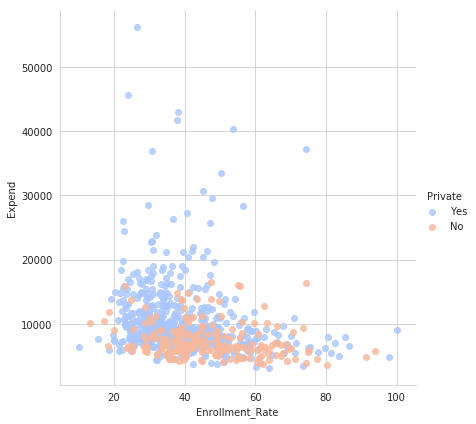

In [7]:
sns.set_style('whitegrid')
sns.lmplot('Enrollment_Rate','Expend',data=dataset, hue='Private',
           palette='coolwarm',height=6,aspect=1,fit_reg=False)

In [8]:
X = dataset.iloc[:, [17, 19]].values #Choosing Room.Board and Grad.Rate as Atrributes
X

array([[7.04100000e+03, 5.85227273e+01],
       [1.05270000e+04, 2.66112266e+01],
       [8.73500000e+03, 3.06289881e+01],
       ...,
       [8.32300000e+03, 3.62924282e+01],
       [4.03860000e+04, 5.36893600e+01],
       [4.50900000e+03, 3.72506739e+01]])

In [9]:
print(X.shape)

m = X.shape[0] #number of training examples
n = X.shape[1] #number of features. Here n will be 2, naturally

print("m,n",m,n)

epochs = 100 #max no. of iterations

(777, 2)
m,n 777 2


In [10]:
K = 2  # number of clusters, for now, change it later

In [11]:
Centroids = np.array([]).reshape(n,0) #Centroids is a n x K dimensional matrix, where each column will be a centroid for one cluster

In [12]:
print(np.array(Centroids))

[]


In [13]:
for i in range(K):
    rand = rd.randint(0,m-1)
    Centroids = np.c_[Centroids,X[rand]]

Centroids

array([[14086.        ,  5569.        ],
       [   37.72378517,    35.96713966]])

In [14]:
Output={} #Dict with key as Cluster no. and Values as each data point in the cluster

In [15]:
'''
EuclidianDistance = np.array([]).reshape(m,0)
for k in range(K):
    tempDist = np.sum((X-Centroids[:,k])**2,axis=1)
    EuclidianDistance = np.c_[EuclidianDistance,tempDist]
C = np.argmin(EuclidianDistance,axis=1)+1

C
'''

'\nEuclidianDistance = np.array([]).reshape(m,0)\nfor k in range(K):\n    tempDist = np.sum((X-Centroids[:,k])**2,axis=1)\n    EuclidianDistance = np.c_[EuclidianDistance,tempDist]\nC = np.argmin(EuclidianDistance,axis=1)+1\n\nC\n'

In [16]:
for i in range(epochs):
     #step 2.a
      EuclidianDistance = np.array([]).reshape(m,0)
      for k in range(K):
          tempDist=np.sum((X-Centroids[:,k])**2,axis=1)
          EuclidianDistance=np.c_[EuclidianDistance,tempDist]
      C=np.argmin(EuclidianDistance,axis=1)+1
     #step 2(b)
      Y={}
      for k in range(K):
          Y[k+1]=np.array([]).reshape(2,0)
      for i in range(m):
          Y[C[i]]=np.c_[Y[C[i]],X[i]]
     
      for k in range(K):
          Y[k+1]=Y[k+1].T
    
      for k in range(K):
          Centroids[:,k]=np.mean(Y[k+1],axis=0)
      Output=Y
    
Output

{1: array([[1.90160000e+04, 3.92550143e+01],
        [2.14240000e+04, 4.21370968e+01],
        [4.29260000e+04, 3.81240545e+01],
        [1.45790000e+04, 4.97005988e+01],
        [1.38940000e+04, 3.40095465e+01],
        [1.63640000e+04, 3.48623853e+01],
        [1.68360000e+04, 2.92919197e+01],
        [2.04470000e+04, 4.10206084e+01],
        [1.53870000e+04, 4.57575758e+01],
        [1.71500000e+04, 2.69777616e+01],
        [2.04400000e+04, 4.51373881e+01],
        [1.74490000e+04, 3.86419753e+01],
        [1.79600000e+04, 3.09689677e+01],
        [2.43860000e+04, 2.28994424e+01],
        [1.97330000e+04, 2.25918885e+01],
        [1.60950000e+04, 4.61928934e+01],
        [1.84430000e+04, 2.95958279e+01],
        [1.59540000e+04, 3.45716452e+01],
        [1.54940000e+04, 2.91733547e+01],
        [1.41400000e+04, 2.93680297e+01],
        [1.46640000e+04, 3.10716550e+01],
        [3.06390000e+04, 4.51295337e+01],
        [1.47730000e+04, 2.83311772e+01],
        [2.29060000e+04, 3.0888

In [17]:
Centroids

array([[19447.71698113,  8114.00149031],
       [   35.88871796,    42.0407412 ]])

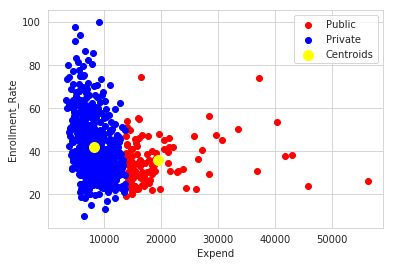

In [18]:
color=['red','blue','green','cyan','magenta']
labels=['Public','Private','cluster-3','cluster-4','cluster-5']
for k in range(K):
    plt.scatter(Output[k+1][:,1],Output[k+1][:,0],c=color[k],label=labels[k])
plt.scatter(Centroids[0,:],Centroids[1,:],s=100,c='yellow',label='Centroids')
plt.xlabel('Enrollment_Rate')
plt.ylabel('Expend')
plt.legend()
plt.show()
#Output[k+1][:,0]
#Output[k+1][:,1]

In [19]:
i2=[]
for i1 in Output[1]:
    i2.append(list(i1))


#i2 is a list of of all the data points clustered as Public

In [20]:
dataset['Class_label'] = np.nan
dataset

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,...,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Enrollment_Rate,Acceptance Rate,Class_label
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,...,2200,70,78,18.1,12,7041,60,58.522727,74.216867,NaN
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,...,1500,29,30,12.2,16,10527,56,26.611227,88.014639,NaN
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,...,1165,53,66,12.9,30,8735,54,30.628988,76.820728,NaN
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,...,875,92,97,7.7,37,19016,59,39.255014,83.693046,NaN
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,...,1500,76,72,11.9,2,10922,15,37.671233,75.647668,NaN
5,Albertson College,Yes,587,479,158,38,62,678,41,13500,...,675,67,73,9.4,11,9727,55,32.985386,81.601363,NaN
6,Albertus Magnus College,Yes,353,340,103,17,45,416,230,13290,...,1500,90,93,11.5,26,8861,63,30.294118,96.317280,NaN
7,Albion College,Yes,1899,1720,489,37,68,1594,32,13868,...,850,89,100,13.7,37,11487,73,28.430233,90.573986,NaN
8,Albright College,Yes,1038,839,227,30,63,973,306,15595,...,500,79,84,11.3,23,11644,80,27.056019,80.828516,NaN
9,Alderson-Broaddus College,Yes,582,498,172,21,44,799,78,10468,...,1800,40,41,11.5,15,8991,52,34.538153,85.567010,NaN


In [21]:
no_of_rows, no_of_cols = dataset.shape
print(no_of_rows)

777


In [22]:
for kk in i2:
    dataset.loc[(dataset['Expend']==kk[0])&(dataset['Enrollment_Rate']==kk[1]),'Class_label'] = 'No'

    
    

In [23]:
dataset

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,...,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Enrollment_Rate,Acceptance Rate,Class_label
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,...,2200,70,78,18.1,12,7041,60,58.522727,74.216867,NaN
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,...,1500,29,30,12.2,16,10527,56,26.611227,88.014639,NaN
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,...,1165,53,66,12.9,30,8735,54,30.628988,76.820728,NaN
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,...,875,92,97,7.7,37,19016,59,39.255014,83.693046,No
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,...,1500,76,72,11.9,2,10922,15,37.671233,75.647668,NaN
5,Albertson College,Yes,587,479,158,38,62,678,41,13500,...,675,67,73,9.4,11,9727,55,32.985386,81.601363,NaN
6,Albertus Magnus College,Yes,353,340,103,17,45,416,230,13290,...,1500,90,93,11.5,26,8861,63,30.294118,96.317280,NaN
7,Albion College,Yes,1899,1720,489,37,68,1594,32,13868,...,850,89,100,13.7,37,11487,73,28.430233,90.573986,NaN
8,Albright College,Yes,1038,839,227,30,63,973,306,15595,...,500,79,84,11.3,23,11644,80,27.056019,80.828516,NaN
9,Alderson-Broaddus College,Yes,582,498,172,21,44,799,78,10468,...,1800,40,41,11.5,15,8991,52,34.538153,85.567010,NaN


In [24]:
i9=[]
for i1 in Output[2]:
    i9.append(list(i1))


#i9 is a list of of all the data points clustered as Private

In [25]:
for kk in i9:
    dataset.loc[(dataset['Expend']==kk[0])&(dataset['Enrollment_Rate']==kk[1]),'Class_label'] = 'Yes'

dataset   

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,...,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Enrollment_Rate,Acceptance Rate,Class_label
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,...,2200,70,78,18.1,12,7041,60,58.522727,74.216867,Yes
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,...,1500,29,30,12.2,16,10527,56,26.611227,88.014639,Yes
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,...,1165,53,66,12.9,30,8735,54,30.628988,76.820728,Yes
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,...,875,92,97,7.7,37,19016,59,39.255014,83.693046,No
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,...,1500,76,72,11.9,2,10922,15,37.671233,75.647668,Yes
5,Albertson College,Yes,587,479,158,38,62,678,41,13500,...,675,67,73,9.4,11,9727,55,32.985386,81.601363,Yes
6,Albertus Magnus College,Yes,353,340,103,17,45,416,230,13290,...,1500,90,93,11.5,26,8861,63,30.294118,96.317280,Yes
7,Albion College,Yes,1899,1720,489,37,68,1594,32,13868,...,850,89,100,13.7,37,11487,73,28.430233,90.573986,Yes
8,Albright College,Yes,1038,839,227,30,63,973,306,15595,...,500,79,84,11.3,23,11644,80,27.056019,80.828516,Yes
9,Alderson-Broaddus College,Yes,582,498,172,21,44,799,78,10468,...,1800,40,41,11.5,15,8991,52,34.538153,85.567010,Yes


In [26]:
dataset[dataset['Class_label'] == np.nan]

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,...,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Enrollment_Rate,Acceptance Rate,Class_label


In [27]:
dataset.shape

(777, 22)

In [28]:
'''
test=dataset.loc[(dataset['Expend']==i2[0][0])&(dataset['Enrollment_Rate']==i2[0][1])]
test['Label']
print(test)
'''
numRows, numCols = dataset.shape

In [29]:
TP=TN=FP=FN=0
# for kk2 in range(numRows):
#     rowdf = dataset.loc[kk2,:]
#     print(rowdf)
    
factual_data=list(dataset['Private'])
test_data=list(dataset['Class_label'])

#print(factual_data,"\n",test_data)

for x,y in zip(factual_data,test_data):
    if x==y and x=='Yes':
        TP+=1
    if x==y and x=='No':
        TN+=1
    if x!=y and x=='Yes':
        FN+=1
    if x!=y and x=='No':
        FP+=1
    
#     if dataset.loc[kk2, dataset.columns.get_loc('Private')]:#.equals(dataset.loc[kk2, dataset.columns.get_loc('Class_label')]):
#         if dataset[kk2, dataset.columns.get_loc('Private')] == 'No':
#             TN+=1
#         else:
#             TP+=1
#     else:
#         if dataset[kk2, dataset.columns.get_loc('Private')] == 'No':
#             FP+=1
#         else:
#             FN+=1

print("ACCURACY by Confusion Matrix:")
print((TP+TN)/(numRows))
print()

print("Recall:")
Recall = (TP/(TP+FN))
print(Recall)
print()

print("Precision:")
Precision = (TP/(TP+FP))
print(Precision)
print()

print("F-Measure:")
print((2*Recall*Precision)/(Recall+Precision))
print()

#Low recall, high precision: Shows that we miss a lot of positive examples (high FN) but those we predict as positive are indeed positive (low FP) 

ACCURACY by Confusion Matrix:
0.6190476190476191

Recall:
0.831858407079646

Precision:
0.7004470938897168

F-Measure:
0.7605177993527508



In [ ]:
from sklearn.cluster import KMeans

from sklearn.decomposition import PCA


